In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
weather_df = pd.read_csv('weather_data.csv')

In [4]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [6]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


In [7]:
# renmae the features
weather_df=weather_df.rename(columns={'Formatted Date':'time','Summary':'summary','Precip Type':'precipType','Temperature (C)':'temperature','Humidity':'humidity','Wind Speed (km/h)':'windSpeed','Wind Bearing (degrees)':'windBearing','Visibility (km)':'visibility','Loud Cover':'loudCover','Pressure (millibars)':'pressure','Daily Summary':'Daily_Summary','Apparent Temperature (C)':'apparentTemperature'})

In [8]:
weather_df.columns

Index(['time', 'summary', 'precipType', 'temperature', 'apparentTemperature',
       'humidity', 'windSpeed', 'windBearing', 'visibility', 'loudCover',
       'pressure', 'Daily_Summary'],
      dtype='object')

In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 5999 non-null   object 
 1   summary              5999 non-null   object 
 2   precipType           5999 non-null   object 
 3   temperature          5999 non-null   float64
 4   apparentTemperature  5999 non-null   float64
 5   humidity             5999 non-null   float64
 6   windSpeed            5999 non-null   float64
 7   windBearing          5999 non-null   int64  
 8   visibility           5999 non-null   float64
 9   loudCover            5999 non-null   int64  
 10  pressure             5999 non-null   float64
 11  Daily_Summary        5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [10]:
##Droping the unused columns 
weather_df.drop(['time'],axis=1,inplace=True)
weather_df.drop(['loudCover'],axis=1,inplace=True)
weather_df.drop(['Daily_Summary'],axis=1,inplace=True)

In [11]:
weather_df.head()

,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   summary              5999 non-null   object 
 1   precipType           5999 non-null   object 
 2   temperature          5999 non-null   float64
 3   apparentTemperature  5999 non-null   float64
 4   humidity             5999 non-null   float64
 5   windSpeed            5999 non-null   float64
 6   windBearing          5999 non-null   int64  
 7   visibility           5999 non-null   float64
 8   pressure             5999 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 421.9+ KB


In [13]:
weather_df.describe()

,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,1045.140000


In [14]:
weather_df.isnull().sum()

summary                0
precipType             0
temperature            0
apparentTemperature    0
humidity               0
windSpeed              0
windBearing            0
visibility             0
pressure               0
dtype: int64

### EDA

In [15]:
weather_df.corr()

,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
temperature,1.000000,0.992881,-0.564260,-0.053935,0.044263,0.432098,-0.080315
apparentTemperature,0.992881,1.000000,-0.535399,-0.126701,0.055151,0.422888,-0.077491
humidity,-0.564260,-0.535399,1.000000,-0.209529,0.041205,-0.343168,0.061836
windSpeed,-0.053935,-0.126701,-0.209529,1.000000,-0.068218,0.078624,-0.043172
windBearing,0.044263,0.055151,0.041205,-0.068218,1.000000,0.016963,-0.052019
visibility,0.432098,0.422888,-0.343168,0.078624,0.016963,1.000000,-0.038036
pressure,-0.080315,-0.077491,0.061836,-0.043172,-0.052019,-0.038036,1.000000


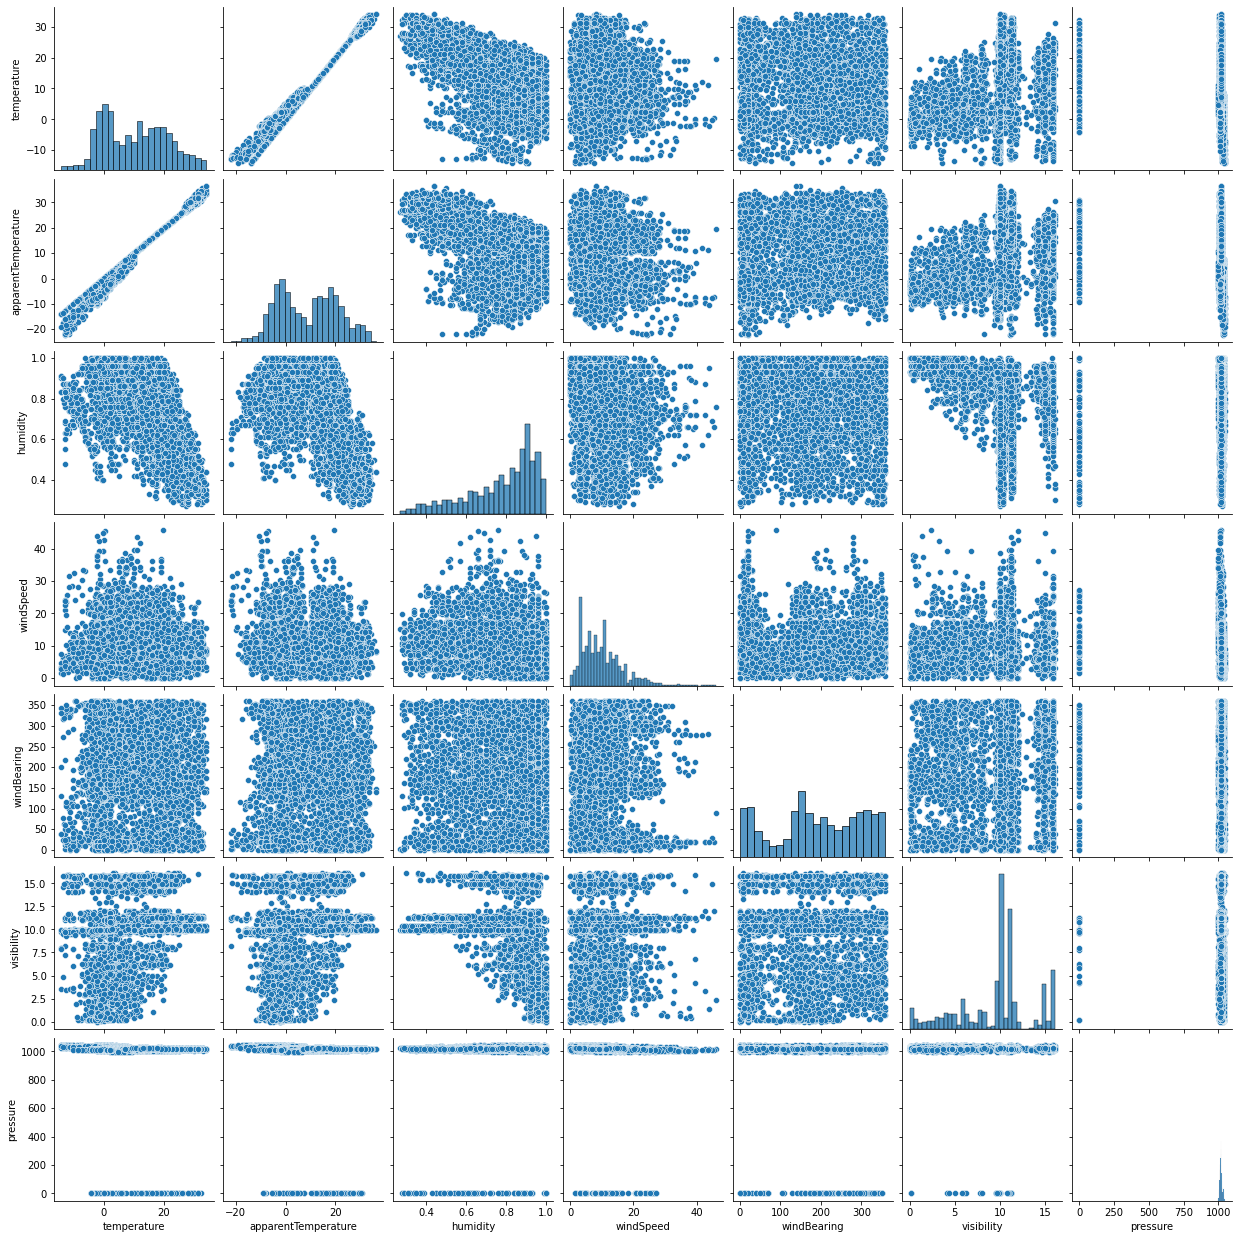

In [16]:
sns.pairplot(weather_df)

Text(0.5, 0, 'humidity')

Text(0, 0.5, 'apparentTemperature')

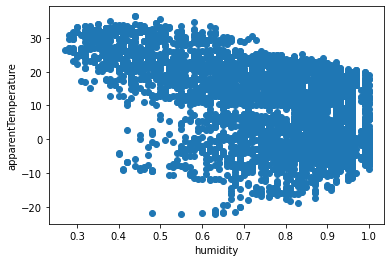

In [17]:
plt.scatter(weather_df['humidity'],weather_df['apparentTemperature'])
plt.xlabel('humidity')
plt.ylabel('apparentTemperature')

Text(0.5, 0, 'windSpeed')

Text(0, 0.5, 'apparentTemperature')

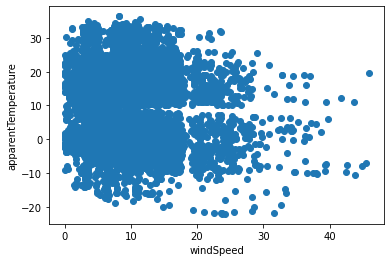

In [18]:
plt.scatter(weather_df['windSpeed'],weather_df['apparentTemperature'])
plt.xlabel('windSpeed')
plt.ylabel('apparentTemperature')

Text(0.5, 0, 'temperature')

Text(0, 0.5, 'apparentTemperature')

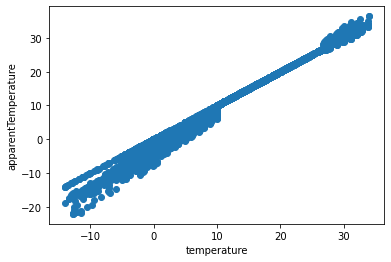

In [19]:
plt.scatter(weather_df['temperature'],weather_df['apparentTemperature'])
plt.xlabel('temperature')
plt.ylabel('apparentTemperature')

<AxesSubplot:xlabel='temperature', ylabel='apparentTemperature'>

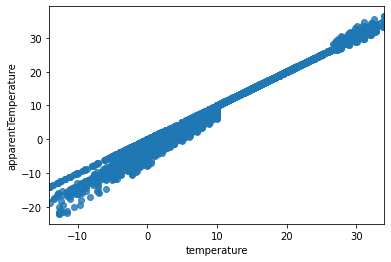

In [20]:
sns.regplot(data=weather_df,x='temperature',y='apparentTemperature')

<AxesSubplot:xlabel='pressure', ylabel='apparentTemperature'>

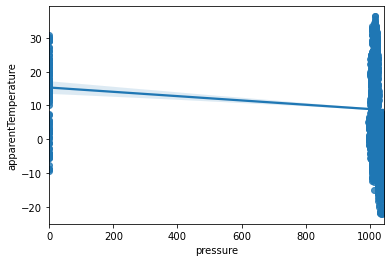

In [21]:
sns.regplot(data=weather_df,x='pressure',y='apparentTemperature')

Text(0.5, 0, 'visibility')

Text(0, 0.5, 'apparentTemperature')

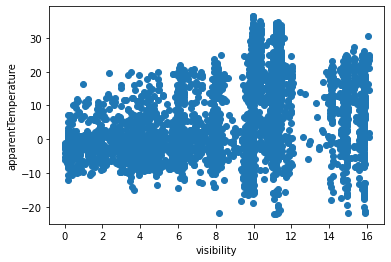

In [22]:
plt.scatter(weather_df['visibility'],weather_df['apparentTemperature'])
plt.xlabel('visibility')
plt.ylabel('apparentTemperature')

<AxesSubplot:xlabel='windBearing', ylabel='apparentTemperature'>

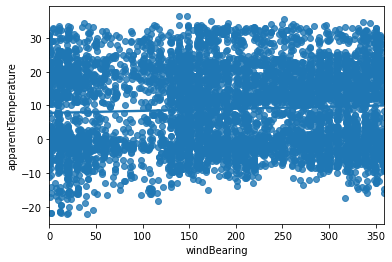

In [23]:
sns.regplot(data=weather_df,x='windBearing',y='apparentTemperature')

In [24]:
weather_df.precipType.value_counts()

rain    4762
snow    1237
Name: precipType, dtype: int64

In [25]:
preciptype_name=weather_df.precipType.value_counts().index

In [26]:
preciptype_val=weather_df.precipType.value_counts().values

([<matplotlib.patches.Wedge at 0x18c0b121580>,
 [Text(-0.877154874750547, 0.6637765630853144, 'rain'),
  Text(0.8771549058241692, -0.663776522022731, 'snow')],
 [Text(-0.4784481135002983, 0.36205994350108056, '79.38%'),
  Text(0.4784481304495468, -0.36205992110330776, '20.62%')])

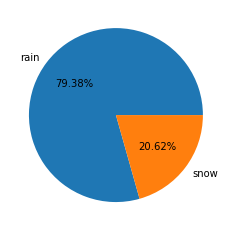

In [27]:
plt.pie(preciptype_val[:],labels=preciptype_name[:], autopct='%1.2f%%')

In [28]:
weather_df.groupby(['summary','precipType']).size().reset_index()

,summary,precipType,0
0,Breezy and Foggy,snow,7
1,Breezy and Mostly Cloudy,rain,18
2,Breezy and Mostly Cloudy,snow,2
3,Breezy and Overcast,rain,17
4,Breezy and Overcast,snow,8
5,Breezy and Partly Cloudy,rain,7
6,Clear,rain,600
7,Clear,snow,253
8,Foggy,rain,283
9,Foggy,snow,293


In [29]:
summary_val=weather_df.summary.value_counts().values

In [30]:
summary_name=weather_df.summary.value_counts().index

([<matplotlib.patches.Wedge at 0x18c0b173280>,
 [Text(0.6398902735426961, 0.8947292539229137, 'Partly Cloudy'),
  Text(-0.9854662299421844, 0.4887292805260781, 'Mostly Cloudy'),
  Text(-0.618836795944823, -0.9094179567089853, 'Overcast'),
  Text(0.534432798399803, -0.9614476501581122, 'Clear'),
  Text(1.0490618675158394, -0.33086129741053066, 'Foggy')],
 [Text(0.349031058296016, 0.48803413850340743, '30.24%'),
  Text(-0.5375270345139187, 0.2665796075596789, '24.87%'),
  Text(-0.3375473432426307, -0.496046158204901, '20.77%'),
  Text(0.2915087991271652, -0.5244259909953338, '14.40%'),
  Text(0.5722155640995487, -0.18046979858756218, '9.72%')])

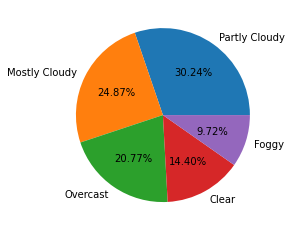

In [31]:
plt.pie(summary_val[:5],labels=summary_name[:5],autopct="%1.2f%%")

In [32]:
weather_df.columns

Index(['summary', 'precipType', 'temperature', 'apparentTemperature',
       'humidity', 'windSpeed', 'windBearing', 'visibility', 'pressure'],
      dtype='object')

### Train Test Split

In [33]:
X=weather_df[['summary', 'precipType', 'temperature', 
       'humidity', 'windSpeed', 'windBearing', 'visibility', 'pressure',
       ]]
y=weather_df['apparentTemperature']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
X_train.head()

,summary,precipType,temperature,humidity,windSpeed,windBearing,visibility,pressure
927,Clear,rain,31.133333,0.36,11.1734,160,16.0517,1011.95
3256,Overcast,snow,-10.044444,0.72,12.1716,14,11.0285,1040.27
45,Mostly Cloudy,rain,15.022222,0.55,21.3808,159,9.9820,1008.15
1260,Overcast,rain,19.083333,0.89,4.4114,350,11.2056,1006.80
1096,Partly Cloudy,rain,23.733333,0.54,13.7172,223,11.2700,1015.39


In [37]:
y_train.head()

927     30.600000
3256   -16.000000
45      15.022222
1260    19.083333
1096    23.733333
Name: apparentTemperature, dtype: float64

In [38]:
print(X_train.shape,y_train.shape)

(4199, 8) (4199,)


In [39]:
X_test.head()

,summary,precipType,temperature,humidity,windSpeed,windBearing,visibility,pressure
84,Mostly Cloudy,rain,8.900000,0.77,29.8333,348,11.2700,1004.47
2409,Mostly Cloudy,rain,4.927778,1.00,17.6617,159,4.7817,999.36
4997,Partly Cloudy,rain,6.077778,0.92,3.7352,285,6.8425,1022.27
346,Mostly Cloudy,rain,14.144444,0.88,4.8783,339,9.9820,1017.82
79,Overcast,rain,6.066667,0.93,27.9818,348,6.3434,1003.96


In [40]:
y_test.head()

84       5.161111
2409     1.288889
4997     6.077778
346     14.144444
79       1.633333
Name: apparentTemperature, dtype: float64

In [41]:
print(X_test.shape,y_train.shape)

(1800, 8) (4199,)


### Separating Categorical and numerical features

In [42]:
X_train.head()

,summary,precipType,temperature,humidity,windSpeed,windBearing,visibility,pressure
927,Clear,rain,31.133333,0.36,11.1734,160,16.0517,1011.95
3256,Overcast,snow,-10.044444,0.72,12.1716,14,11.0285,1040.27
45,Mostly Cloudy,rain,15.022222,0.55,21.3808,159,9.9820,1008.15
1260,Overcast,rain,19.083333,0.89,4.4114,350,11.2056,1006.80
1096,Partly Cloudy,rain,23.733333,0.54,13.7172,223,11.2700,1015.39


In [43]:
X_train.dtypes

summary         object
precipType      object
temperature    float64
humidity       float64
windSpeed      float64
windBearing      int64
visibility     float64
pressure       float64
dtype: object

In [44]:
Obj_dty = X_train.select_dtypes(include=['object'])

In [45]:
Obj_dty.head()

,summary,precipType
927,Clear,rain
3256,Overcast,snow
45,Mostly Cloudy,rain
1260,Overcast,rain
1096,Partly Cloudy,rain


In [46]:
num_dty = X_train.select_dtypes(include=['int64','float64'])

In [47]:
num_dty.head()

,temperature,humidity,windSpeed,windBearing,visibility,pressure
927,31.133333,0.36,11.1734,160,16.0517,1011.95
3256,-10.044444,0.72,12.1716,14,11.0285,1040.27
45,15.022222,0.55,21.3808,159,9.9820,1008.15
1260,19.083333,0.89,4.4114,350,11.2056,1006.80
1096,23.733333,0.54,13.7172,223,11.2700,1015.39


### Rescaling the numerical features

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
num_dty_rescaled=pd.DataFrame(scaler.fit_transform(num_dty),columns=num_dty.columns,index=num_dty.index)

In [50]:
num_dty_rescaled.head()

,temperature,humidity,windSpeed,windBearing,visibility,pressure
927,1.975309,-2.437853,0.179392,-0.283472,1.626100,0.096629
3256,-1.904195,-0.354184,0.330239,-1.648142,0.382056,0.294833
45,0.457424,-1.338139,1.721931,-0.292819,0.122880,0.070033
1260,0.840036,0.629771,-0.842480,1.492467,0.425916,0.060585
1096,1.278129,-1.396018,0.563810,0.305392,0.441865,0.120704


### Using OneHotEncoding on categorical features

In [51]:
Obj_dty = X_train.select_dtypes(include=['object'])

In [52]:
Obj_dty.head()

,summary,precipType
927,Clear,rain
3256,Overcast,snow
45,Mostly Cloudy,rain
1260,Overcast,rain
1096,Partly Cloudy,rain


In [53]:
Obj_dty['summary'].value_counts(normalize=True)

Partly Cloudy               0.299119
Mostly Cloudy               0.242677
Overcast                    0.205525
Clear                       0.145273
Foggy                       0.094546
Breezy and Overcast         0.005001
Breezy and Mostly Cloudy    0.002620
Breezy and Foggy            0.001191
Humid and Mostly Cloudy     0.001191
Windy and Overcast          0.000953
Breezy and Partly Cloudy    0.000953
Humid and Partly Cloudy     0.000476
Windy and Foggy             0.000238
Windy and Partly Cloudy     0.000238
Name: summary, dtype: float64

In [54]:
Obj_dty['precipType'].value_counts(normalize=True)

rain    0.788759
snow    0.211241
Name: precipType, dtype: float64

In [55]:
Obj_dty_enc=pd.get_dummies(Obj_dty,columns=['summary','precipType'])

In [56]:
Obj_dty_enc.head()

,summary_Breezy and Foggy,summary_Breezy and Mostly Cloudy,summary_Breezy and Overcast,summary_Breezy and Partly Cloudy,summary_Clear,summary_Foggy,summary_Humid and Mostly Cloudy,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Windy and Foggy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precipType_rain,precipType_snow
927,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3256,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1260,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1096,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Applying lable encoding

In [57]:
Obj_dty_label = pd.DataFrame(index=Obj_dty.index)

In [58]:
Obj_dty_label.head()

""
927
3256
45
1260
1096


In [59]:
Obj_dty.summary.unique()

array(['Clear', 'Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Foggy',
       'Windy and Overcast', 'Breezy and Foggy',
       'Humid and Partly Cloudy', 'Breezy and Mostly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Windy and Foggy',
       'Windy and Partly Cloudy'], dtype=object)

In [60]:
summary_={'Clear':1, 'Overcast':2, 'Mostly Cloudy':3, 'Partly Cloudy':4, 'Foggy':5,
       'Windy and Overcast':6, 'Breezy and Foggy':7,
       'Humid and Partly Cloudy':8, 'Breezy and Mostly Cloudy':9,
       'Breezy and Overcast':10, 'Humid and Mostly Cloudy':11,
       'Breezy and Partly Cloudy':12, 'Windy and Foggy':13,
       'Windy and Partly Cloudy':14}

In [61]:
Obj_dty_label['summary']= Obj_dty['summary'].apply(lambda x:summary_[x])

In [62]:
Obj_dty_label

,summary
927,1
3256,2
45,3
1260,2
1096,4
...,...
3772,3
5191,7
5226,1
5390,1


In [63]:
Obj_dty.precipType.unique()

array(['rain', 'snow'], dtype=object)

In [64]:
precipType_ = {'rain':0,'snow':1}

In [65]:
Obj_dty_label['precipType']=Obj_dty['precipType'].apply(lambda x:precipType_ [x])

In [66]:
Obj_dty_label

,summary,precipType
927,1,0
3256,2,1
45,3,0
1260,2,0
1096,4,0
...,...,...
3772,3,0
5191,7,1
5226,1,0
5390,1,0


In [67]:
# Concatination
X_train_transformed = pd.concat([num_dty_rescaled,Obj_dty_label],axis=1)

X_train_transformed.head()

,temperature,humidity,windSpeed,windBearing,visibility,pressure,summary,precipType
927,1.975309,-2.437853,0.179392,-0.283472,1.626100,0.096629,1,0
3256,-1.904195,-0.354184,0.330239,-1.648142,0.382056,0.294833,2,1
45,0.457424,-1.338139,1.721931,-0.292819,0.122880,0.070033,3,0
1260,0.840036,0.629771,-0.842480,1.492467,0.425916,0.060585,2,0
1096,1.278129,-1.396018,0.563810,0.305392,0.441865,0.120704,4,0


### Test data

In [68]:
X_test.head()

,summary,precipType,temperature,humidity,windSpeed,windBearing,visibility,pressure
84,Mostly Cloudy,rain,8.900000,0.77,29.8333,348,11.2700,1004.47
2409,Mostly Cloudy,rain,4.927778,1.00,17.6617,159,4.7817,999.36
4997,Partly Cloudy,rain,6.077778,0.92,3.7352,285,6.8425,1022.27
346,Mostly Cloudy,rain,14.144444,0.88,4.8783,339,9.9820,1017.82
79,Overcast,rain,6.066667,0.93,27.9818,348,6.3434,1003.96


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 84 to 2232
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   summary      1800 non-null   object 
 1   precipType   1800 non-null   object 
 2   temperature  1800 non-null   float64
 3   humidity     1800 non-null   float64
 4   windSpeed    1800 non-null   float64
 5   windBearing  1800 non-null   int64  
 6   visibility   1800 non-null   float64
 7   pressure     1800 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 126.6+ KB


In [70]:
X_test_Object = X_test.select_dtypes(include=['object'])

In [71]:
X_test_Object

,summary,precipType
84,Mostly Cloudy,rain
2409,Mostly Cloudy,rain
4997,Partly Cloudy,rain
346,Mostly Cloudy,rain
79,Overcast,rain
...,...,...
841,Overcast,rain
2570,Mostly Cloudy,rain
1189,Mostly Cloudy,rain
175,Mostly Cloudy,rain


In [72]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [73]:
X_test_num

,temperature,humidity,windSpeed,windBearing,visibility,pressure
84,8.900000,0.77,29.8333,348,11.2700,1004.47
2409,4.927778,1.00,17.6617,159,4.7817,999.36
4997,6.077778,0.92,3.7352,285,6.8425,1022.27
346,14.144444,0.88,4.8783,339,9.9820,1017.82
79,6.066667,0.93,27.9818,348,6.3434,1003.96
...,...,...,...,...,...,...
841,16.161111,0.97,6.2951,169,6.1180,1010.10
2570,1.088889,0.85,11.0768,279,14.7315,1021.07
1189,24.861111,0.46,10.5777,335,9.9820,1011.21
175,11.133333,0.77,15.4882,150,9.9820,1013.27


In [74]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

In [75]:
X_test_rescaled

,temperature,humidity,windSpeed,windBearing,visibility,pressure
84,-0.119372,-0.064786,2.999271,1.473773,0.441865,0.044278
2409,-0.493609,1.266447,1.159902,-0.292819,-1.165025,0.008514
4997,-0.385263,0.803410,-0.944667,0.884909,-0.654648,0.168856
346,0.374726,0.571891,-0.771922,1.389650,0.122880,0.137711
79,-0.386310,0.861289,2.719473,1.473773,-0.778255,0.040709
...,...,...,...,...,...,...
841,0.564723,1.092808,-0.557816,-0.199349,-0.834078,0.083681
2570,-0.855284,0.398252,0.164793,0.828827,1.299140,0.160457
1189,1.384381,-1.859056,0.089370,1.352261,0.122880,0.091449
175,0.091038,-0.064786,0.831443,-0.376943,0.122880,0.105867


In [76]:
X_test_lable = pd.DataFrame(index=X_test_Object.index)

In [77]:
X_test_lable

""
84
2409
4997
346
79
...
841
2570
1189
175


In [78]:
X_test_lable['summary']=X_test_Object['summary'].apply(lambda x:summary_[x])
X_test_lable['precipType']=X_test_Object['precipType'].apply(lambda x:precipType_[x])

In [79]:
X_test_lable

,summary,precipType
84,3,0
2409,3,0
4997,4,0
346,3,0
79,2,0
...,...,...
841,2,0
2570,3,0
1189,3,0
175,3,0


In [80]:
#Test data Concatination

X_test_transformed = pd.concat([X_test_rescaled,X_test_lable],axis=1)

X_test_transformed

,temperature,humidity,windSpeed,windBearing,visibility,pressure,summary,precipType
84,-0.119372,-0.064786,2.999271,1.473773,0.441865,0.044278,3,0
2409,-0.493609,1.266447,1.159902,-0.292819,-1.165025,0.008514,3,0
4997,-0.385263,0.803410,-0.944667,0.884909,-0.654648,0.168856,4,0
346,0.374726,0.571891,-0.771922,1.389650,0.122880,0.137711,3,0
79,-0.386310,0.861289,2.719473,1.473773,-0.778255,0.040709,2,0
...,...,...,...,...,...,...,...,...
841,0.564723,1.092808,-0.557816,-0.199349,-0.834078,0.083681,2,0
2570,-0.855284,0.398252,0.164793,0.828827,1.299140,0.160457,3,0
1189,1.384381,-1.859056,0.089370,1.352261,0.122880,0.091449,3,0
175,0.091038,-0.064786,0.831443,-0.376943,0.122880,0.105867,3,0


### Model training

### Linear regression

In [81]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [82]:
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [83]:
## coefficient and intercept

print(regressor.coef_)

[11.76424983  0.08178154 -0.88947876  0.07378539  0.0405771  -0.01420414
  0.06196221 -0.35274387]


In [84]:
print(regressor.intercept_)

8.787283197527572


In [85]:
print(regressor.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [86]:
#prediction with test data
reg_pred=regressor.predict(X_test_transformed)

In [87]:
reg_pred

array([ 5.02180609,  2.16909326,  5.44509279, ..., 25.13130826,
        9.27498754, -5.146323  ])

### Assumptions

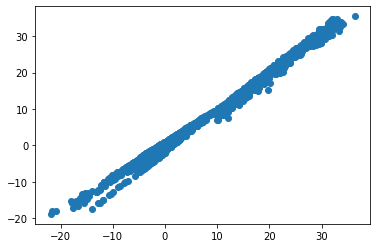

In [88]:
plt.scatter(y_test,reg_pred)

In [89]:
# residuals 
residuals = y_test-reg_pred

In [90]:
residuals

84      0.139305
2409   -0.880204
4997    0.632685
346    -0.076037
79     -0.461333
          ...   
841     0.070565
2570   -1.164527
1189   -0.270197
175     1.858346
2232   -0.192566
Name: apparentTemperature, Length: 1800, dtype: float64

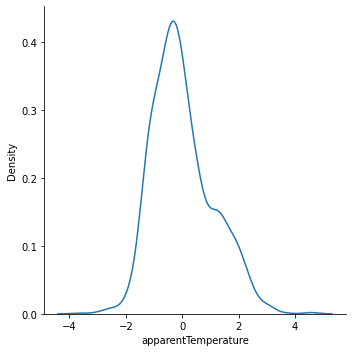

In [91]:
# plot residuals
sns.displot(residuals,kind='kde')

In [92]:
# uniform Distribution
# plt.scatter(reg_pred,residuals)

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [94]:
print(mean_absolute_error(reg_pred,y_test))

0.8446215643631835


In [95]:
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.1409820030055673
1.068167591254091


In [96]:
from sklearn.metrics import r2_score

In [97]:
score=r2_score(y_test,reg_pred)
print(score)

0.9917764445161431


In [98]:
# Display adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9917397117166619

### KNN 

In [99]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [100]:
knn.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [101]:
knn_test=knn.predict(X_test_transformed)

In [105]:
from sklearn.metrics import r2_score

In [106]:
score=r2_score(y_test,knn_test)
print(score)

0.973556946242307


### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [109]:
dtree.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [110]:
reg_pred = dtree.predict(X_test_transformed)

In [111]:
from sklearn.metrics import r2_score

In [113]:
score=r2_score(y_test,reg_pred)
print(score)

0.9994976272070172
